# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

But before we can get started, I will talk about a few admin things. 

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

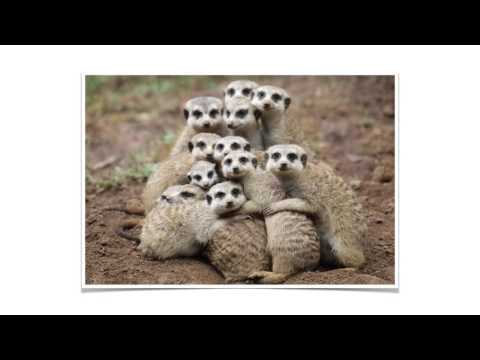

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?


<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the text.
</div>

1) the key problem with using random networks as a model for real-world networks is that the Poisson degree distribution, which random networks typically follow, underestimates the number of highly connected nodes. The real-world network has more signification variations than the random network which follows the possion degree distribution

2) 1.Subscritical regime $<k> < 1$
   2.Critical point $<k> = 1$
   3.Supercritical regime $<k> > 1$
   4.Fully connected regime $<k> > lnN$

3)  random networks typically exhibit a very different behavior: clustering is generally uniform or decreases sharply for all nodes, regardless of degree. This mismatch makes random networks poor models for many real-world systems.

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
num_nodes = 500
k = 4  
p_values = [0, 0.1, 1]  

graphs = [nx.watts_strogatz_graph(num_nodes, k, p) for p in p_values]

avg_shortest_path_lengths = []
for graph in graphs:
    avg_shortest_path_lengths.append(nx.average_shortest_path_length(graph))

print(avg_shortest_path_lengths)
'''The network becomes a random networks when p=1'''

[62.875751503006015, 7.987967935871744, 4.722068136272545]


'The network becomes a random networks when p=1'

In [8]:
# Parameters for the experiment
num_nodes = 500
k = 4  # Average degree
p_values = np.linspace(0, 1, 50)  # 50 values of p between 0 and 1

# Function to calculate average shortest path length for each value of p
avg_shortest_paths = []
for p in p_values:
    G = nx.watts_strogatz_graph(num_nodes, k, p)
    avg_shortest_paths.append(nx.average_shortest_path_length(G))

# Find the value of p where the average shortest path gets close to the fully randomized network
fully_randomized_path_length = avg_shortest_paths[-1]  # Value at p = 1
target_path_length = fully_randomized_path_length * 1.05  # Close to 5% of fully randomized value

# Find the closest value of p to the target
closest_p_index = np.argmin(np.abs(np.array(avg_shortest_paths) - target_path_length))
closest_p = p_values[closest_p_index]

print(f"Closest value of p: {closest_p}")
print(f"Average shortest path length at this p: {avg_shortest_paths[closest_p_index]}")
print(f"Average shortest path length in fully randomized network (p = 1): {fully_randomized_path_length}")


Closest value of p: 0.4897959183673469
Average shortest path length at this p: 5.0244328657314625
Average shortest path length in fully randomized network (p = 1): 4.7787334669338675


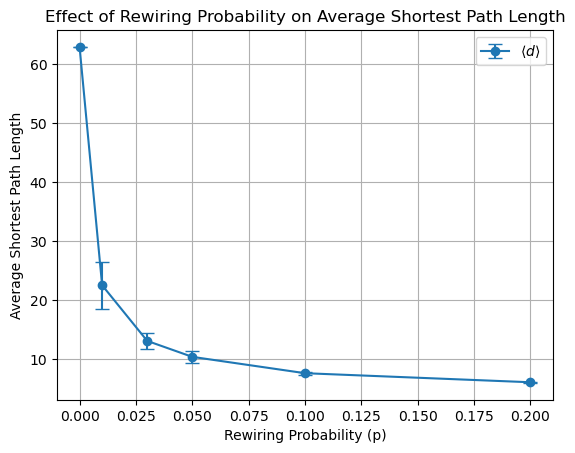

In [10]:


# Parameters
num_nodes = 500  # Reduced the number of nodes for faster computation
k = 4  # Average degree
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_simulations = 50  # Number of networks to simulate for each p

# Lists to store average shortest path length and standard deviation for each p
avg_shortest_paths = []
std_shortest_paths = []

# Function to calculate average and standard deviation of shortest path lengths for given p
for p in p_values:
    path_lengths = []
    for _ in range(num_simulations):
        G = nx.watts_strogatz_graph(num_nodes, k, p)
        path_length = nx.average_shortest_path_length(G)
        path_lengths.append(path_length)
    
    avg_shortest_paths.append(np.mean(path_lengths))
    std_shortest_paths.append(np.std(path_lengths))

# Plotting the results with error bars
plt.errorbar(p_values, avg_shortest_paths, yerr=std_shortest_paths, fmt='-o', capsize=5, label=r"$\langle d \rangle$")
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Effect of Rewiring Probability on Average Shortest Path Length')
plt.grid(True)
plt.legend()
plt.show()


## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

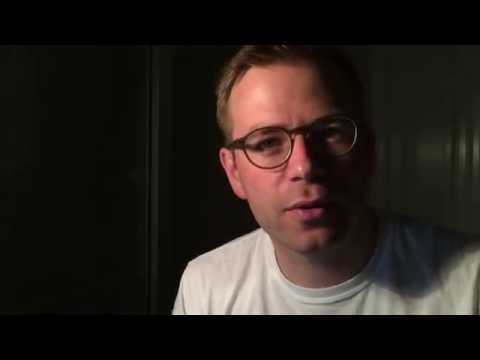

In [3]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (remember last week's exercise), and as always, it's OK to ask your LLM for help with the styling. 
</div>

# Part 3: The friendship paradox in scale-free networks

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

*Exercise*. The friendship paradox in BA networks

> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-info">
If you want to maximize your learning, think through the questions and code up the exercise above on your own. Again, it's empowering to realize that you can actually do it. I encourage you, however, to ask your LLM to explain the configuration model to you (might be more fun that reading the Wiki page).
</div>

*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


<div class="alert alert-block alert-info">
This second part of the exercise is asking you to think about differences between two models for random networks. For this one, an appealing option could be to use an LLM to help quickly create the networks two and then analyze them using networkx. That way you can check your thinking.   
</div>
<div class="alert alert-block alert-info">
Don't use an LLM for the two last questions "Are there factors ..." and "How would you test ..." Use your brain, do some research and write down your own answer before consulting an LLM.
</div>


*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>